<h2 align = "center"> Exploratory Factor Analysis </h2> 

### Some Key terms

* Difference between EFA and PCA are 
1) EFA wants to explain something and tries to only have a small number of variables with very high loadings but make other variables' loadings fairly small so that we can "explain" the factor based on the most important variables
2) EFA is not only a transformation or dimensionality reduction like ins the PCA but it allow the factors to be correlated with one or another. the latent variables may be found with error but it is ok 

In [1]:
brand.ratings = read.csv("http://goo.gl/IQl8nc")

In [2]:
library(nFactors)

Loading required package: MASS
Loading required package: psych
Loading required package: boot

Attaching package: 'boot'

The following object is masked from 'package:psych':

    logit

Loading required package: lattice

Attaching package: 'lattice'

The following object is masked from 'package:boot':

    melanoma


Attaching package: 'nFactors'

The following object is masked from 'package:lattice':

    parallel



In [3]:
brand.sc = brand.ratings

### Determnine how many factors you want to use

* Use scree plot

In [4]:
nScree(brand.sc[,1:9])

  noc naf nparallel nkaiser
1   3   2         3       3

* Use the eigenvalues (An eigenvalue of 1 or larger. bc engivalue of 1 corresponds to the amount of the variance that can be captured by a single independent variable; a factor captures less variance than that may be considered uninteresting

In [5]:
eigen(cor(brand.sc[,1:9]))

0.23746787,-0.41991179,0.03854006,0.52630873,0.46793435,-0.33706757,0.36417911,-0.14444718,-0.05223384
0.20582566,-0.52381901,-0.09512739,0.08923461,-0.29452974,-0.29688599,-0.61367430,0.28766118,0.17889453
-0.37038063,-0.20145317,-0.53273054,-0.21410754,0.10586676,-0.17420585,-0.18548031,-0.64290436,-0.05750244
-0.251060118,0.250379726,-0.417813462,0.750639524,-0.331494294,0.140536707,-0.007114761,0.074612590,-0.031533061
0.15974020,-0.51047254,-0.04067075,-0.09893394,-0.55515540,0.39248744,0.44530286,-0.18354764,-0.09072231
0.39917306,0.21849698,-0.48989756,-0.16734345,-0.01257429,-0.13939661,0.28826490,0.05789194,0.64720849
0.44745619,0.18980822,-0.36924507,-0.15118500,-0.06327757,-0.21953273,0.01716301,0.14829295,-0.72806108
-0.35102924,-0.31849032,-0.37090530,-0.16764432,0.36649697,0.26581857,0.15357211,0.61450289,-0.05907022
0.43901842,-0.01509832,-0.12461593,0.13031231,0.35568769,0.67513997,-0.38865616,-0.20210688,0.01720236


<h4><font color = "red"> Always try several factor combinations and to see which one is more useful or interpretable</font></h4>

In [6]:
factanal(brand.sc[,1:9], factors = 2)


Call:
factanal(x = brand.sc[, 1:9], factors = 2)

Uniquenesses:
perform  leader  latest     fun serious bargain   value  trendy   rebuy 
  0.635   0.332   0.796   0.835   0.527   0.354   0.225   0.708   0.585 

Loadings:
        Factor1 Factor2
perform          0.600 
leader           0.818 
latest  -0.451         
fun     -0.137  -0.382 
serious          0.686 
bargain  0.803         
value    0.873   0.117 
trendy  -0.534         
rebuy    0.569   0.303 

               Factor1 Factor2
SS loadings      2.245   1.759
Proportion Var   0.249   0.195
Cumulative Var   0.249   0.445

Test of the hypothesis that 2 factors are sufficient.
The chi square statistic is 556.19 on 19 degrees of freedom.
The p-value is 8.66e-106 

In [7]:
factanal(brand.sc[,1:9], factors = 3)


Call:
factanal(x = brand.sc[, 1:9], factors = 3)

Uniquenesses:
perform  leader  latest     fun serious bargain   value  trendy   rebuy 
  0.624   0.327   0.005   0.794   0.530   0.302   0.202   0.524   0.575 

Loadings:
        Factor1 Factor2 Factor3
perform          0.607         
leader           0.810   0.106 
latest  -0.163           0.981 
fun             -0.398   0.205 
serious          0.682         
bargain  0.826          -0.122 
value    0.867          -0.198 
trendy  -0.356           0.586 
rebuy    0.499   0.296  -0.298 

               Factor1 Factor2 Factor3
SS loadings      1.853   1.752   1.510
Proportion Var   0.206   0.195   0.168
Cumulative Var   0.206   0.401   0.568

Test of the hypothesis that 3 factors are sufficient.
The chi square statistic is 64.57 on 12 degrees of freedom.
The p-value is 3.28e-09 

In [8]:
library(GPArotation)

In [9]:
brand.fa.ob = factanal(brand.sc[,1:9], factors = 3, rotation = "oblimin")

In [10]:
brand.fa.ob


Call:
factanal(x = brand.sc[, 1:9], factors = 3, rotation = "oblimin")

Uniquenesses:
perform  leader  latest     fun serious bargain   value  trendy   rebuy 
  0.624   0.327   0.005   0.794   0.530   0.302   0.202   0.524   0.575 

Loadings:
        Factor1 Factor2 Factor3
perform          0.601         
leader           0.816         
latest                   1.009 
fun             -0.381   0.229 
serious          0.689         
bargain  0.859                 
value    0.880                 
trendy  -0.267   0.128   0.538 
rebuy    0.448   0.255  -0.226 

               Factor1 Factor2 Factor3
SS loadings      1.789   1.733   1.430
Proportion Var   0.199   0.193   0.159
Cumulative Var   0.199   0.391   0.550

Factor Correlations:
        Factor1 Factor2 Factor3
Factor1  1.0000  -0.388  0.0368
Factor2 -0.3884   1.000 -0.1091
Factor3  0.0368  -0.109  1.0000

Test of the hypothesis that 3 factors are sufficient.
The chi square statistic is 64.57 on 12 degrees of freedom.
The p-value is

* we should look at the change in loadings to see whether there is any change in the interpretation of the factor and also the correlation matrix 

### Visualize the result

* Heatmaps

In [11]:
library(gplots)


Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [12]:
library(RColorBrewer)

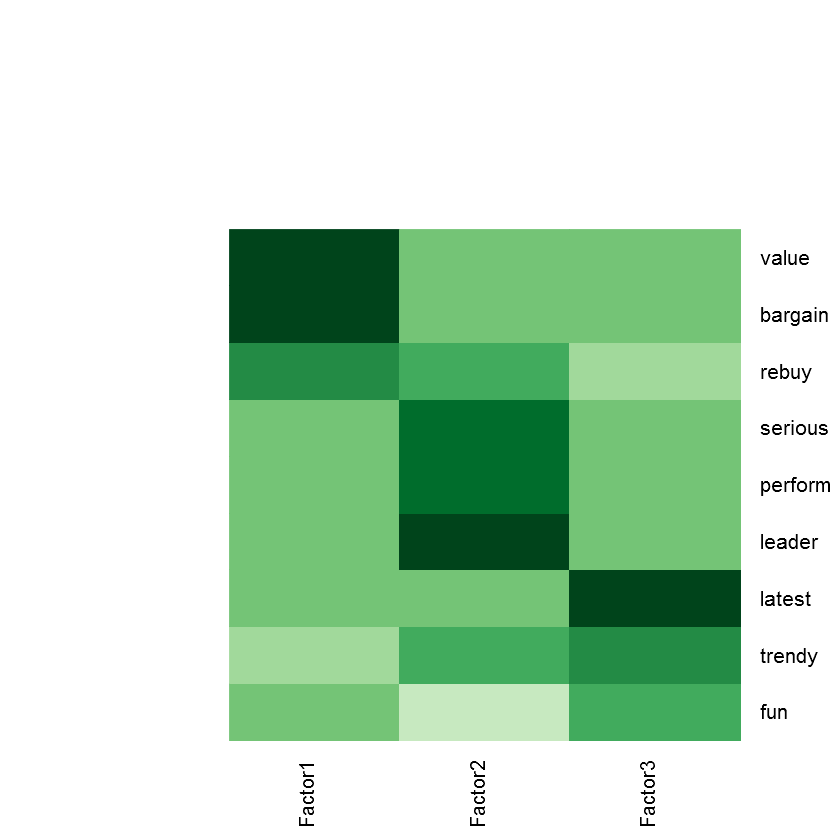

In [14]:
heatmap.2(brand.fa.ob$loadings, col = brewer.pal(9, "Greens"), trace = "none", key = FALSE, dend = "none", Colv = FALSE, cexCol = 1.2)

* Use the path diagram

In [16]:
library(semPlot)

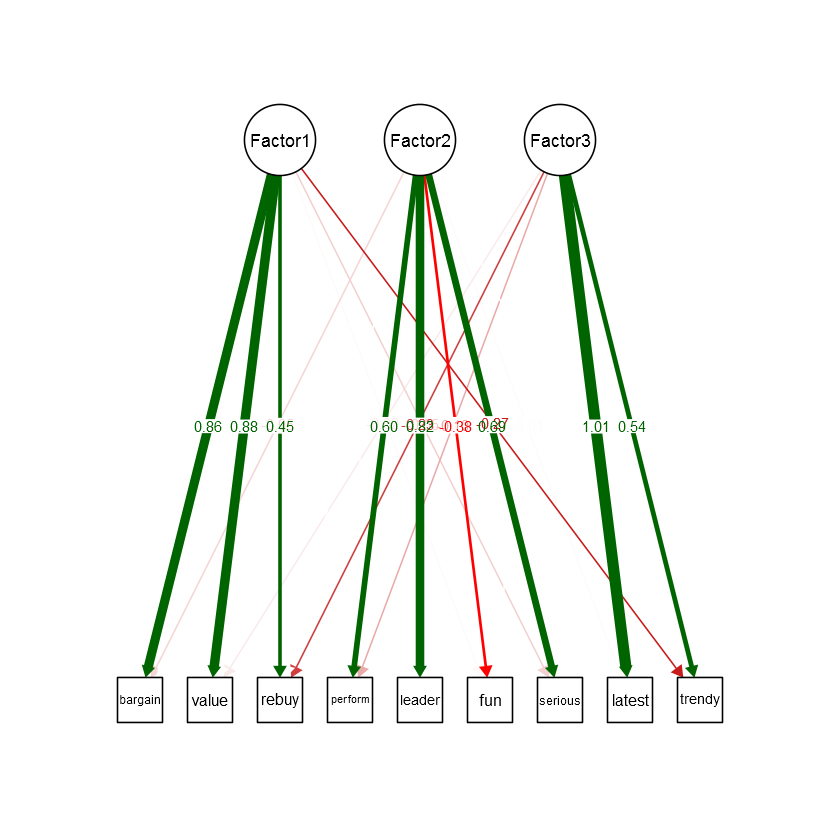

In [17]:
semPaths(brand.fa.ob, what = "est", residuals = FALSE, cut = 0.3, #cut the loadings with absolute magnitude < 0.3 
         posCol = c("white", "darkgreen"), negClol = c("white", "red"), edge.label.cex = 0.75, nCharNodes = 7)

### Calculate factor scores for brands

* this gives us the best estimates of each respondent's latent rating to each factor 
* It can be used later in the regression or segments settings

In [18]:
brand.fa.ob = factanal(brand.sc[,1:9], factors = 3, rotation = "oblimin", scores = "Bartlett")

In [19]:
brand.scores = data.frame(brand.fa.ob$scores)

In [20]:
brand.scores$brand = brand.sc$brand

In [21]:
head(brand.scores)

,Factor1,Factor2,Factor3,brand
1,1.65213641245182,-0.688674919258656,0.525610396116165,a
2,-1.40053332875154,-1.66819013541209,-0.676412108895464,a
3,1.14573107817665,-1.06180076257205,-0.428585267715562,a
4,0.200972456167215,-0.324546159914997,1.21134235841866,a
5,2.00020091193899,-1.90715191576431,-0.45599049873947,a
6,1.41750630007543,0.333946238028482,0.85555245729712,a
